1. ⟨ 3 Marks ⟩ Use Least Square method to find 3 best fit lines using ”Education” as independent and ”Salary”
as dependent variable, ”Occupation” as independent and ”Salary” as dependent variable and ”Experience” as
independent and ”Salary” as dependent variable. Plot the best fit lines for all three case.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [262]:
file_path = "archive/Salary.csv"

# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)


In [263]:
print (data)

    First Name  Last Name        Education     Occupation  Experience (Years)   
0      Freddie      Smith         Doctoral          Baker                   8  \
1       Robert   Ferguson          Primary      Economist                  12   
2        Adele   Harrison          Primary    Electrician                  17   
3      Miranda  Alexander         Doctoral       Producer                   8   
4        Julia       Cole          Primary     Agronomist                  24   
..         ...        ...              ...            ...                 ...   
195      Oscar   Ferguson         Bachelor       Producer                  29   
196     Arthur      Scott  Upper secondary      Geologist                  19   
197    Abigail      Clark           Master  Mathematician                  24   
198     Harold      Owens  Upper secondary      Geologist                   5   
199       Carl     Walker         Bachelor        Insurer                  15   

     Salary  
0    142875  

In [264]:
print((data['Experience (Years)'].unique()))

[ 8 12 17 24  3  1 15  7  5 23 14  4 21 26 19 18 16  6 22 10 30 20 28 29
  2 27 13 11 25  9  0]


In [265]:
def calculate_best_fit(x, y):
    n = len(x)
    
    # Calculate the necessary sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x**2)
    sum_xy = np.sum(x * y)
    
    # Calculate the coefficients of the best-fit line
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    c = (sum_y - m * sum_x) / n
    
    return m, c


In [266]:
df = pd.DataFrame(data)

In [267]:
discrete_columns = [ 'Occupation' ]

In [268]:

# import pandas as pd

# Assuming you have a DataFrame called 'data' with an 'Occupation' column
# Replace 'data' with your actual DataFrame name if it's different

# Get unique values in the 'Occupation' column
unique_occupations = df['Occupation'].unique()
print(len(unique_occupations))
# Create a mapping of unique values to integers
occupation_mapping = {occupation: idx+1 for idx, occupation in enumerate(unique_occupations)}

# Create a new column 'Occupation_ID' with the mapped values
df['Occupation_ID'] =df['Occupation'].map(occupation_mapping)
## did from 1 to 51
print(max(df['Occupation_ID'].unique()))
# Now, data['Occupation_ID'] contains the integer mapping for each unique value in the 'Occupation' column


51
51


In [269]:
# Create custom binary encoding for each discrete column

column_values = df['Occupation']
    
    # Calculate unique values and their counts
unique_values, value_counts = column_values.unique(), column_values.value_counts()

    # Iterate through unique values and print both the value and the number of rows
    
print(value_counts)


Occupation
Lawer                9
Engineer             7
Salesman             7
Hairdresser          7
Photographer         6
Cook                 6
Chemist              6
Auditor              6
Insurer              6
Medic                6
Composer             6
Mechanic             5
Firefighter          5
Agronomist           5
Programmer           5
Physicist            5
Historian            5
Lecturer             4
Driver               4
Interpreter          4
Economist            4
Geologist            4
Botanist             4
Graphic Designer     4
Meteorologist        4
Mathematician        4
Carpenter            4
Pharmacist           4
Police Officer       4
Producer             4
Manager              4
Jeweller             4
Teacher              3
Aeroplane Pilot      3
Chef                 3
Veterinarian         3
Dancer               3
Interior Designer    3
Journalist           2
Singer               2
Fashion Designer     2
Fine Artist          2
Architect            2


In [270]:
# Create custom binary encoding for each discrete column

column_values = df['Education']
    
    # Calculate unique values and their counts
unique_values, value_counts = column_values.unique(), column_values.value_counts()

    # Iterate through unique values and print both the value and the number of rows
    
print(value_counts)


Education
Doctoral           42
Bachelor           36
Lower secondary    36
Primary            34
Upper secondary    31
Master             21
Name: count, dtype: int64


## Mapping the values to primary - 1 , Lower secondary - 2 , Upper secondary - 3 , Bachelor - 4 , Master - 5 , Doctoral - 6

In [271]:
education_mapping = {
    'Primary': 1,
    'Lower secondary': 2,
    'Upper secondary': 3,
    'Bachelor': 4,
    'Master': 5,
    'Doctoral': 6
}

In [272]:
# Use the map function to create a new column with binary encoded values
df['Education_encoded'] = df['Education'].map(education_mapping)


In [273]:

# Print the resulting DataFrame to see the encoded values
print(df[['Education', 'Education_encoded']])


           Education  Education_encoded
0           Doctoral                  6
1            Primary                  1
2            Primary                  1
3           Doctoral                  6
4            Primary                  1
..               ...                ...
195         Bachelor                  4
196  Upper secondary                  3
197           Master                  5
198  Upper secondary                  3
199         Bachelor                  4

[200 rows x 2 columns]


In [274]:
print((data['Occupation'].unique()))


['Baker' 'Economist' 'Electrician' 'Producer' 'Agronomist' 'Salesman'
 'Police Officer' 'Fine Artist' 'Medic' 'Interior Designer' 'Dancer'
 'Insurer' 'Lawer' 'Carpenter' 'Engineer' 'Auditor' 'Photographer'
 'Programmer' 'Chemist' 'Meteorologist' 'Veterinarian' 'Graphic Designer'
 'Lecturer' 'Botanist' 'Historian' 'Aeroplane Pilot' 'Interpreter'
 'Firefighter' 'Chef' 'Hairdresser' 'Astronomer' 'Physicist' 'Jeweller'
 'Mathematician' 'Driver' 'Composer' 'Teacher' 'Cook' 'Florist'
 'Journalist' 'Scientist' 'Fashion Designer' 'Pharmacist' 'Architect'
 'Manager' 'Accountant' 'Geologist' 'Singer' 'Mechanic' 'Social Worker'
 'Biochemist']


In [275]:
discrete_columns = ['Occupation']

In [276]:
df.to_csv('modified_salary_data.csv', index=False)

In [277]:
data = pd.read_csv("modified_salary_data.csv")

In [278]:
education_salary_max = data.groupby('Education_encoded')['Salary'].max()
# Print the result
print(education_salary_max)

Education_encoded
1    194623
2    199768
3    198022
4    186446
5    181527
6    185877
Name: Salary, dtype: int64


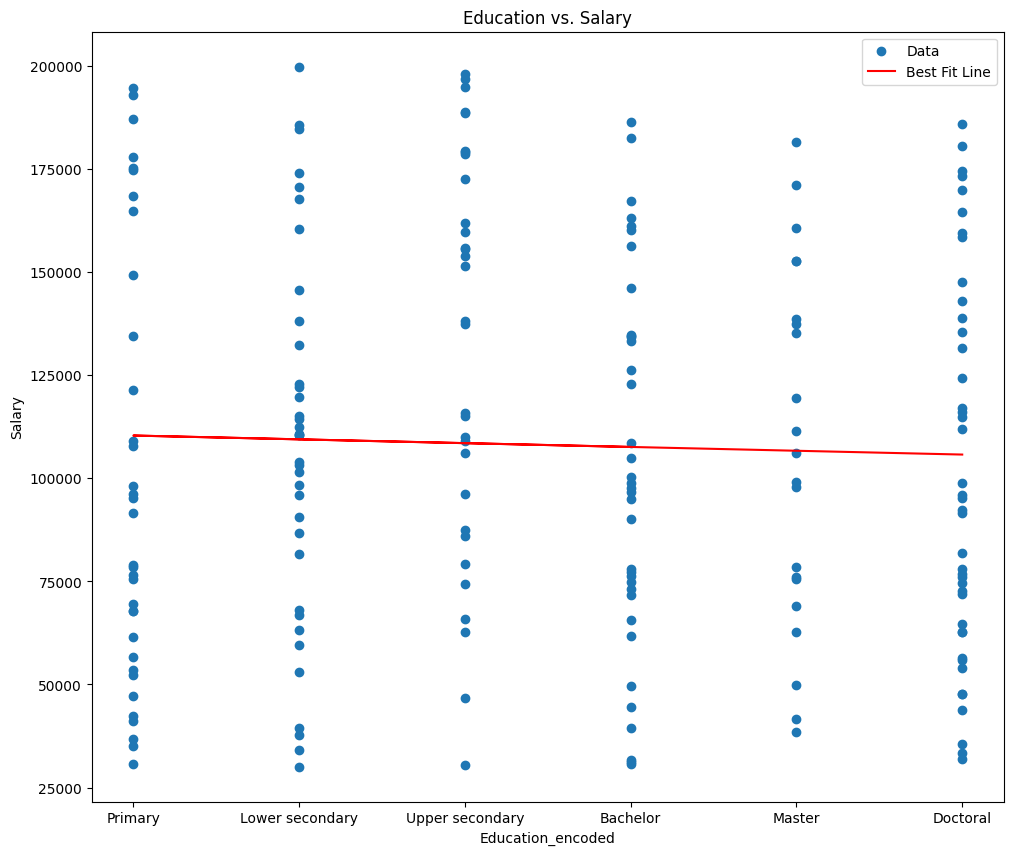

In [279]:



m_ed, c_ed = calculate_best_fit(data['Education_encoded'], df['Salary'])

m_experience, c_experience = calculate_best_fit(data['Experience (Years)'], data['Salary'])

# Plot the data points
plt.figure(figsize=(40,10))

plt.subplot(1, 3, 1)
plt.scatter(data['Education_encoded'], data['Salary'], label='Data')
plt.plot(data['Education_encoded'], m_ed * data['Education_encoded'] + c_ed, 'r', label='Best Fit Line')
plt.xlabel('Education_encoded')
plt.ylabel('Salary')
plt.xticks(list(education_mapping.values()), list(education_mapping.keys()))  # Set custom x-axis labels

plt.title('Education vs. Salary')
plt.legend()



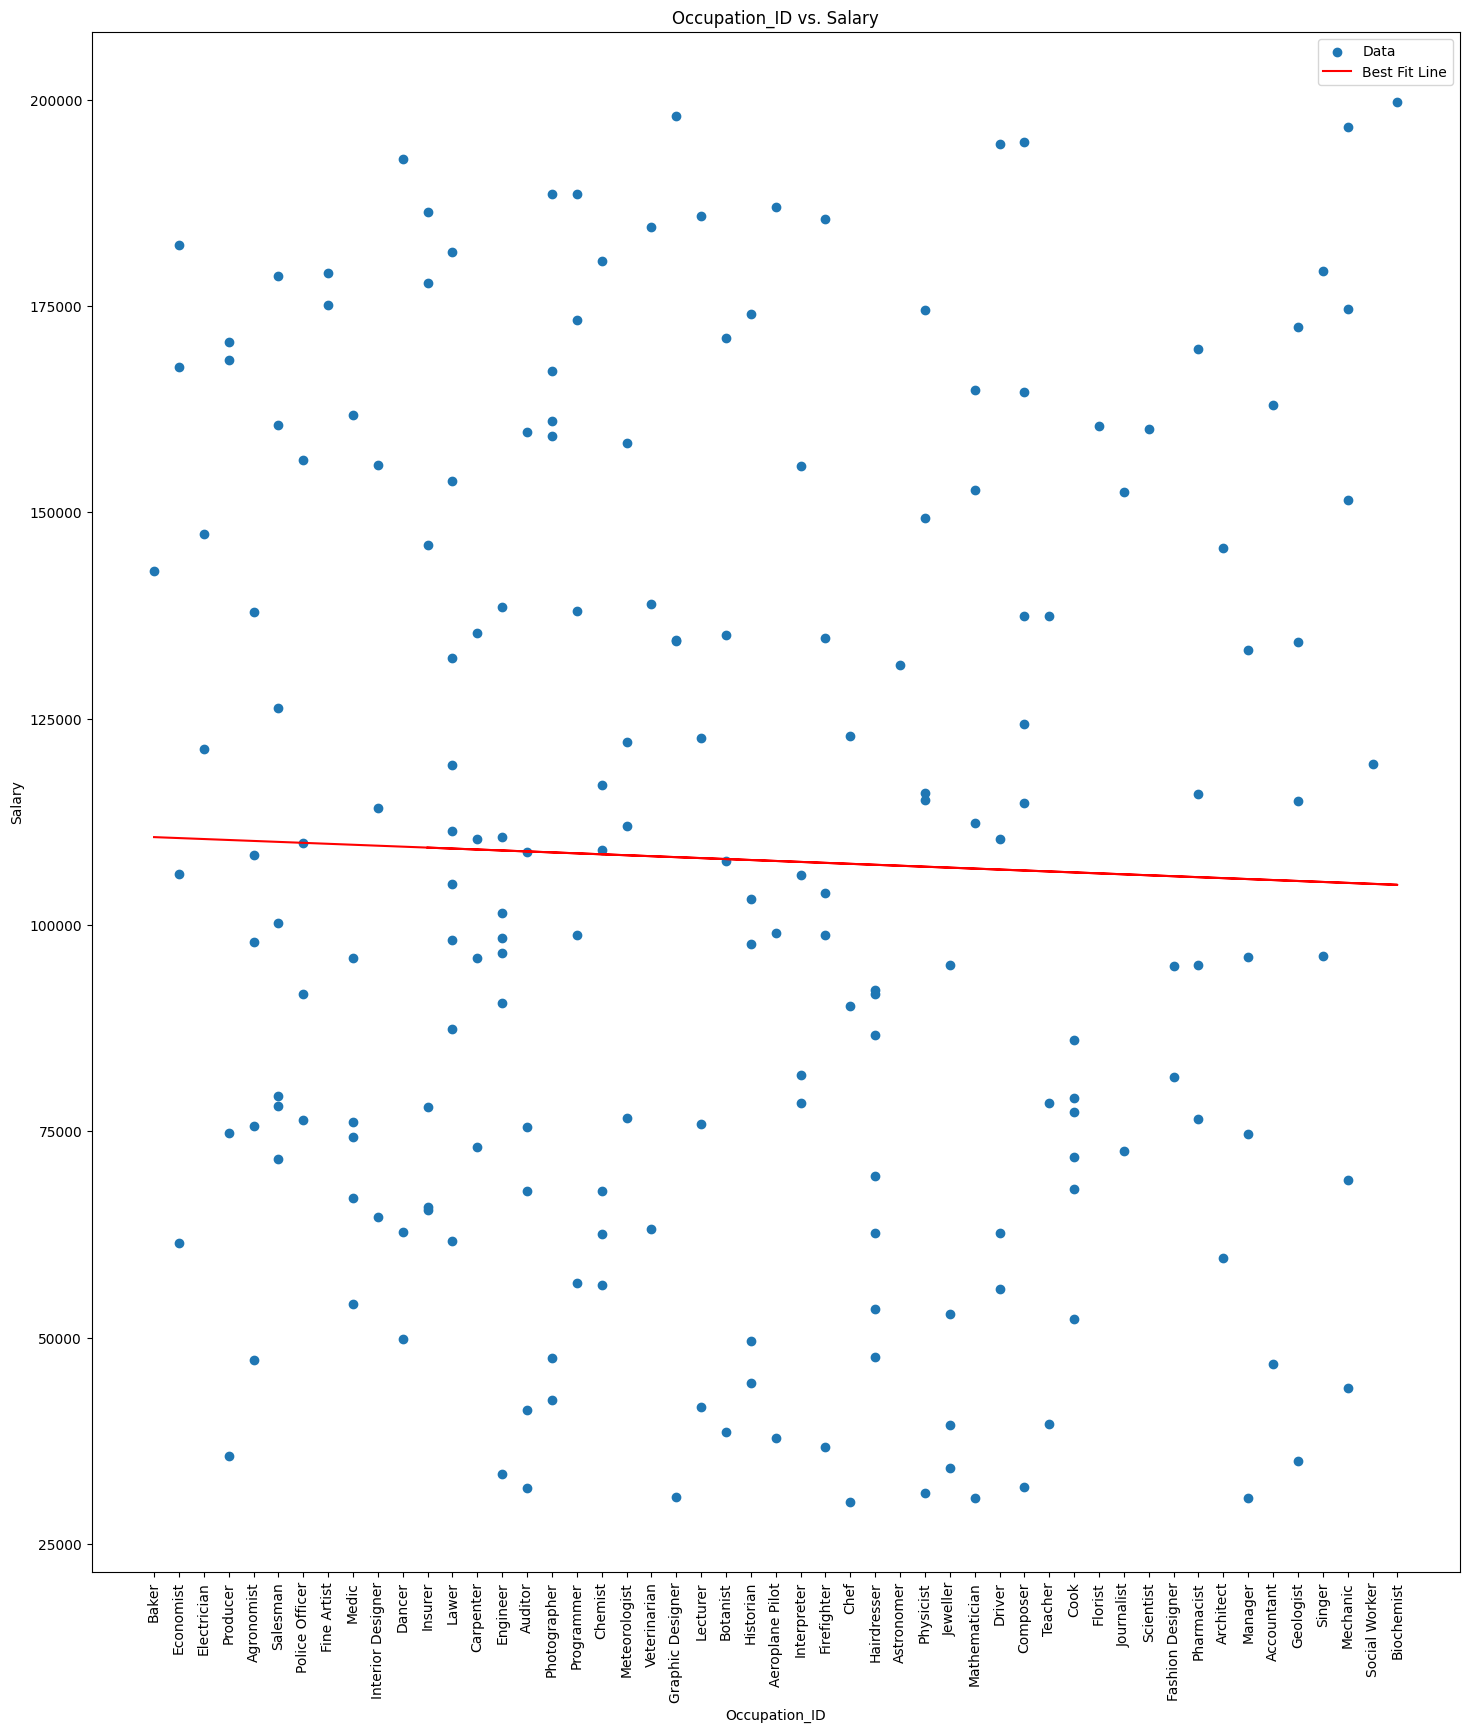

In [280]:
m_ed, c_ed = calculate_best_fit(data['Occupation_ID'], data['Salary'])

plt.figure(figsize=(60, 20))
plt.subplot(1, 3, 2)

plt.scatter(data['Occupation_ID'], data['Salary'], label='Data')
plt.plot(data['Occupation_ID'], m_ed * data['Occupation_ID'] + c_ed, 'r', label='Best Fit Line')
plt.xlabel('Occupation_ID')
plt.ylabel('Salary')
plt.xticks(list(occupation_mapping.values()), list(occupation_mapping.keys()), rotation = 90)  # Set custom x-axis labels

plt.title('Occupation_ID vs. Salary')
plt.legend()

plt.show()


## This is because of diff factors which apply to salary and is diff for diff fields ( not only experience)

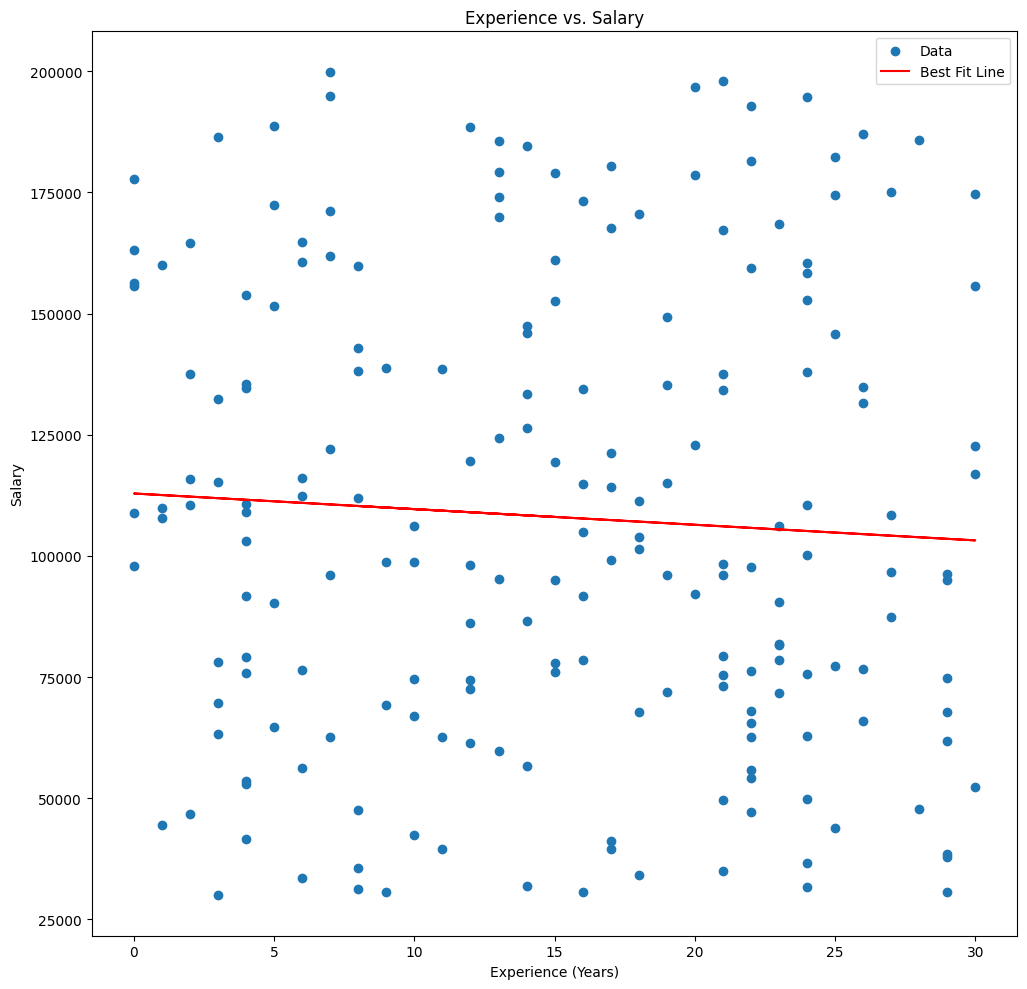

In [281]:
plt.figure(figsize=(30,10))
plt.subplot(1, 3, 3)
plt.scatter(data['Experience (Years)'], data['Salary'], label='Data')
plt.plot(data['Experience (Years)'], m_experience * data['Experience (Years)'] + c_experience, 'r', label='Best Fit Line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')
plt.legend()


plt.tight_layout()
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------

In [282]:
# Calculate the predicted values
predicted_values = m_ed * data['Education_encoded'] + c_ed

# Calculate the mean of the dependent variable (Salary)
mean_salary = np.mean(data['Salary'])

# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)

# Calculate the R-squared value
r_squared = 1 - (rss / tss)

print(f"R-squared: {r_squared}")


R-squared: -0.0021367705212655963


In [283]:
# Calculate the predicted values
predicted_values =  m_ed * data['Occupation_ID'] + c_ed
# Calculate the mean of the dependent variable (Salary)
mean_salary = np.mean(data['Salary'])

# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)

# Calculate the R-squared value
r_squared = 1 - (rss / tss)

print(f"R-squared: {r_squared}")


R-squared: 0.001070092071818518


In [284]:
predicted_values =  m_experience * data['Experience (Years)'] + c_experience

# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)

# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)

# Calculate the R-squared value
r_squared = 1 - (rss / tss)

print(f"R-squared: {r_squared}")


R-squared: 0.003463147394885513


Observation : 
For Education_encoded:

R-squared: -0.0021367705212655963
Interpretation: A negative R-squared value indicates that the linear regression model for Education_encoded does not explain the variability in Salary well. In fact, it suggests that the model may perform worse than a horizontal line (a model that predicts a constant value for all data points). This could be due to the absence of a meaningful relationship between Education_encoded and Salary in the data.
For Occupation_ID:

R-squared: 0.001070092071818518
Interpretation: A very low positive R-squared value suggests that the linear regression model for Occupation_ID explains only a tiny proportion of the variability in Salary. This implies that Occupation_ID is not a strong predictor of Salary based on the linear relationship modeled in this context.
For Experience (Years):

R-squared: 0.003463147394885513
Interpretation: A low positive R-squared value indicates that the linear regression model for Experience (Years) explains a small but slightly higher proportion of the variability in Salary compared to the previous two models. However, it still suggests that other factors not included in the model may have a significant impact on Salary. 

### 3. ⟨ 2 Marks ⟩ Use above mentioned dependent and independent variables to perform a multiple linear regression and compare its performance with polynomial regression. Comment your observation

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('modified_salary_data.csv')  # Replace 'your_data.csv' with the actual filename

# Define the dependent and independent variables
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Perform multiple linear regression
X_train_with_bias = np.c_[np.ones((len(X_train), 1)), X_train]  # Add bias term
weights = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)
linear_pred = X_test.dot(weights[1:]) + weights[0]

# Calculate the performance metrics for linear regression
linear_mse = ((linear_pred - y_test) ** 2).mean()
linear_r2 = 1 - (linear_mse / ((y_test - y_test.mean()) ** 2).mean())

# Perform polynomial regression (degree=2)
X_train_poly = np.c_[X_train, X_train[:, 1] ** 2]
X_test_poly = np.c_[X_test, X_test[:, 1] ** 2]

weights_poly = np.linalg.inv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

# Compare the performance
print("Multiple Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)



Multiple Linear Regression:
Mean Squared Error: 2036094764.7887852
R-squared: 0.003434531606073321


In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('modified_salary_data.csv')

# Define the dependent and independent variables
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Function to add polynomial features to the input data
def add_polynomial_features(X, degree):
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

# Choose the degree of the polynomial
degree = 3

# Add polynomial features to the training and testing data
X_train_poly = add_polynomial_features(X_train, degree)
X_test_poly = add_polynomial_features(X_test, degree)

# Perform polynomial regression
X_train_with_bias = np.c_[np.ones((len(X_train_poly), 1)), X_train_poly]  # Add bias term
weights = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)
poly_pred = X_test_poly.dot(weights[1:]) + weights[0]

# Calculate the performance metrics for polynomial regression
poly_mse = ((poly_pred - y_test) ** 2).mean()
poly_r2 = 1 - (poly_mse / ((y_test - y_test.mean()) ** 2).mean())

# Print the results
print("Polynomial Regression:")
print("Mean Squared Error:", poly_mse)
print("R-squared:", poly_r2)


Polynomial Regression:
Mean Squared Error: 1975976532.8866105
R-squared: 0.03285936731150785


##### for X_train = 
#### [[x1_1, x2_1, x3_1],
#### [x1_2, x2_2, x3_2],
#### [x1_3, x2_3, x3_3],
#### ...
#### [x1_n, x2_n, x3_n]]

##### => 
for degree= 3
#### X_train_poly = 
##### [[x1_1, x2_1, x3_1, x1_1^2, x1_1*x2_1, x1_1*x3_1, x2_1^2, x2_1*x3_1, x3_1^2, x1_1^3, x2_1^3, x3_1^3, x1_1^2*x2_1, x1_1^2*x3_1, x1_1*x2_1^2, x1_1*x3_1^2, x2_1^2*x3_1, x2_1*x3_1^2],
##### [x1_2, x2_2, x3_2, x1_2^2, x1_2*x2_2, x1_2*x3_2, x2_2^2, x2_2*x3_2, x3_2^2, x1_2^3, x2_2^3, x3_2^3, x1_2^2*x2_2, x1_2^2*x3_2, x1_2*x2_2^2, x1_2*x3_2^2, x2_2^2*x3_2, x2_2*x3_2^2],
##### [x1_3, x2_3, x3_3, x1_3^2, x1_3*x2_3, x1_3*x3_3, x2_3^2, x2_3*x3_3, x3_3^2, x1_3^3, x2_3^3, x3_3^3, x1_3^2*x2_3, x1_3^2*x3_3, x1_3*x2_3^2, x1_3*x3_3^2, x2_3^2*x3_3, x2_3*x3_3^2],
##### ...
##### [x1_n, x2_n, x3_n, x1_n^2, x1_n*x2_n, x1_n*x3_n, x2_n^2, x2_n*x3_n, x3_n^2, x1_n^3, x2_n^3, x3_n^3, x1_n^2*x2_n, x1_n^2*x3_n, x1_n*x2_n^2, x1_n*x3_n^2, x2_n^2*x3_n, x2_n*x3_n^2]]


#### Observation

###### Both models have relatively high MSE values, indicating that neither of them provides a particularly good fit to the data, as the predictions are quite far from the actual data points.
###### The R-squared values for both models are low, suggesting that they do not capture much of the variance in the dependent variable. However, the Polynomial Regression model performs 10 times better in terms of R-squared, indicating that it explains a bit more of the variability compared to the Multiple Linear Regression model.
